# Полиномиальная регрессия
---
**Выполнила:** Халфина Айсылу Зуфаровна

**Группа:** НПМбд-02-19

---

Дана сложная математическая функция на отрезке $x\in[1, 15]$

$f(x)=sin\frac{x}{5}\cdot e^{\frac{x}{10}}+5e^{-\frac{1}{2}x}$

Первым шагом визуализируем эту функцию. Для этого будем использовать библиотеки **numpy**, а также модкль **pyplot** из библиотеки **matplotlib**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Следующим шагом определим нашу функцию.

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

После этого приступим к построению графика.

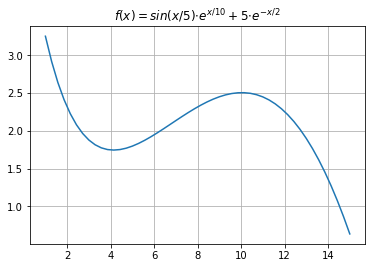

In [3]:
x = np.linspace(1, 15)
y = f(x)
plt.title("$f(x) = sin(x/5) ⋅ e^{x/10} + 5 ⋅ e^{-x/2}$")
plt.plot(x, y)
plt.grid(True)

Задача состоит в том, чтобы приблизить сложную зависимость с помощью функции из 
определенного семейства. В этом задании мы будем приближать указанную функцию с 
помощью многочленов

## Полиномиальная регрессия

Воспользуемся описанным свойством и будем находить приближение функции 
многочленом, решая систему линейных уравнений.

Напишем функцию решения системы уравнений.

In [64]:
def compute_polynomial_coeffs(n):
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

Затем напишем функцию построения полинома

In [65]:
def polynome(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

Теперь, что бы не дублировать код, напишем функцию построения наших графиков.

In [66]:
def plot(n):
    w = compute_polynomial_coeffs(n)
    xx = np.linspace(1, 15, 100)
    x_points = np.linspace(1, 15, n)
    y_points = f(x_points)
    
    plt.plot(xx, f(xx), label='f(x)')
    plt.plot(xx, polynome(w, xx), '--', label='polynome')
    plt.plot(x_points, y_points, 'o', label='points')
    plt.legend()
    plt.grid(True)

Построим графики для $n = 5$

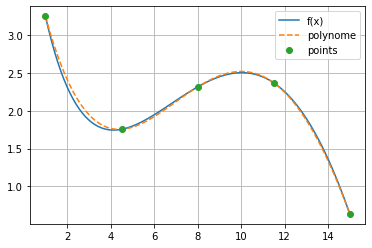

In [67]:
n = 5
plot(n)

Затем построим графики для $n = 15$

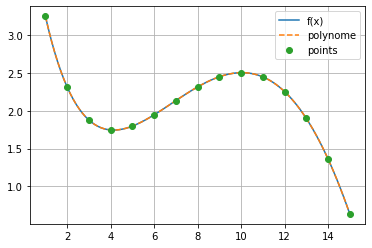

In [68]:
n = 15
plot(n)

По графикам видно, что с ростом степени многочлена увеличивается и точность приближения. При $n = 5$ расхождение на графике всё ещё заметно, а при $n = 15$ его уже нет.

## Полиномиальная регрессия с зашумлённым данными

Рассмотрим случай, когда значение функции $f$ известно с некоторой неточностью. Для этого добавим к значению функции случайный шум. Шум сгенерируем из гауссового распределения с нулевым средним и стандартным отклонением $\sigma = 0.01$

In [69]:
def compute_polynomial_coeffs(xx, yy):
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

def noisy_plot(n):
    noise = 0.1
    x_points = np.linspace(1, 15, n)
    y_points = f(x_points) + np.random.randn(n) * noise
    w = compute_polynomial_coeffs(x_points, y_points)
    xx = np.linspace(1, 15, 100)
    
    plt.plot(xx, f(xx), label='f(x)')
    plt.plot(xx, polynome(w, xx), '--', label='polynome')
    plt.plot(x_points, y_points, 'o', label='points')
    plt.legend()
    plt.grid(True)

Так же построим графики для $n = 5$

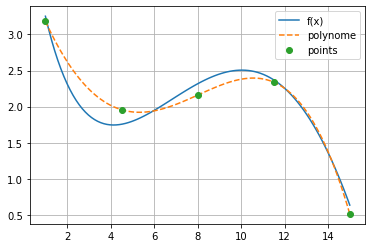

In [70]:
n = 5
noisy_plot(n)

И для $n = 15$

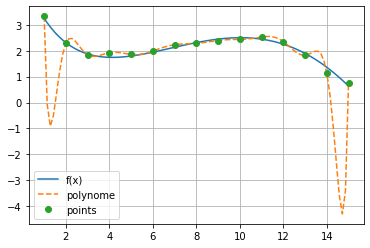

In [71]:
n = 15
noisy_plot(n)

При добавлении шума можно заметить, что точность приближения сильно страдает даже при малой степени многочлена. При увеличении степени расхождение становится всё сильнее.

## Метод наименьших квадратов

Возьмём $N = 100$ точек. Добавим шум с коэффициентом $\sigma = 0.1$ и построим кубический полином методом наименьших квадратов.

In [58]:
def lowest_squares(x, y):
    n = 4
    N = len(x)
    A = np.zeros((N, n))
    
    for i in range (n):
            A[:,i] = x**i
    
    return np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A)).dot(y)

def sqrt_plot(n):
    noise = 0.1
    x_points = np.linspace(1, 15, n)
    y_points = f(x_points) + np.random.randn(n) * noise

    w = lowest_squares(x_points, y_points)

    plt.plot(x_points, f(x_points), label='f(x)')
    plt.plot(x_points, polynome(w, x_points), '--', label='polynome')
    plt.plot(x_points, y_points, 'o', label='points')
    plt.legend()
    plt.grid(True)

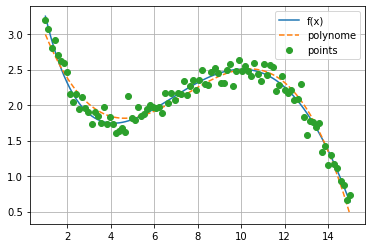

In [59]:
n = 100
sqrt_plot(n)

При использовании метода наименьших квадратов, график аппроксимации имеет достаточно большую степерь точности, несмотря на высокий уровень шума.